In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fish_data = pd.read_csv('../20211201 머신러닝 1일차/Fish.csv')

In [3]:
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df_length = fish_data.loc[(fish_data['Species'] == 'Bream') | (fish_data['Species'] == 'Smelt')]['Length1']
df_weight = fish_data.loc[(fish_data['Species'] == 'Bream') | (fish_data['Species'] == 'Smelt')]['Weight']

In [5]:
length = np.array(df_length)
weight = np.array(df_weight)

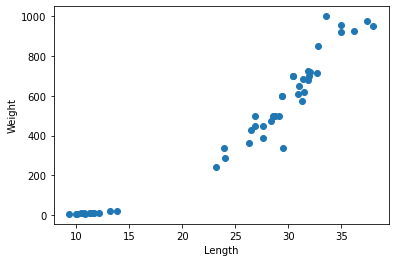

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(length, weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [7]:
mean_length = np.mean(length)
mean_weight = np.mean(weight)

In [8]:
diff_length = sum([(i-mean_length)**2 for i in length])
print(diff_length)

4086.81387755102


In [9]:
def top(X, meanX, Y, meanY):
    diff_value = 0
    for i in range(len(X)):
        diff_value += (X[i] - meanX) * (Y[i] - meanY)
    return diff_value

In [10]:
diff_num = top(length, mean_length, weight, mean_weight)
print('분모 : ', diff_length)
print('분자 : ', diff_num)

분모 :  4086.81387755102
분자 :  139572.90999999997


In [11]:
a = diff_num / diff_length
b = mean_weight - (mean_length * a)
print('기울기 a =', a)
print('y절편 b =', b)

기울기 a = 34.15201038801345
y절편 b = -404.6304950146282


In [12]:
predict_weight = a * length + b
err = weight - predict_weight
print(predict_weight, weight)

[387.69614599 415.0177543  411.60255326 493.56737819 500.39778027
 510.64338338 510.64338338 537.96499169 537.96499169 568.70180104
 565.2866     575.53220312 589.19300728 602.85381143 599.43861039
 599.43861039 633.59062078 633.59062078 650.66662597 654.08182701
 664.32743013 667.74263117 671.15783221 681.40343532 684.81863636
 681.40343532 688.2338374  712.14024467 715.55544571 739.46185298
 790.68986857 790.68986857 831.67228103 872.6546935  893.14589973
 -87.01679841 -63.11039113 -59.6951901  -49.44958698 -39.20398386
 -35.78878282 -18.71277763 -18.71277763 -15.29757659 -11.88237555
  -5.05197347   8.60883068  46.17604211  66.66724834] [ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.     6.7    7.5    7.     9.7    9.8
    8.7   10.     9.9    9.8   12.2   13.4   12.2   19.7   19.9]


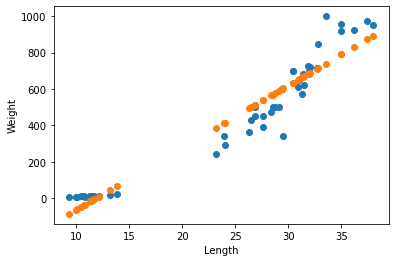

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(length, weight)
plt.scatter(length, predict_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [14]:
a = 0
b = 0
lr = 0.0028
epochs = 20000

In [15]:
for i in range(epochs):
    predict_weight = a * length + b
    err = weight - predict_weight
    
    a_diff = -(1/len(length)) * sum(length * err)
    b_diff = -(1/len(length)) * sum(err)
    
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print('epoch=%.f, 기울기=%.04f, 절편=%.04f' %(i, a, b))

epoch=0, 기울기=38.9204, 절편=1.2446
epoch=100, 기울기=20.9208, 절편=-12.6613
epoch=200, 기울기=20.7368, 절편=-25.5019
epoch=300, 기울기=21.1542, 절편=-37.9015
epoch=400, 기울기=21.5786, 절편=-49.8948
epoch=500, 기울기=21.9897, 절편=-61.4958
epoch=600, 기울기=22.3875, 절편=-72.7175
epoch=700, 기울기=22.7722, 절편=-83.5722
epoch=800, 기울기=23.1444, 절편=-94.0718
epoch=900, 기울기=23.5044, 절편=-104.2282
epoch=1000, 기울기=23.8526, 절편=-114.0523
epoch=1100, 기울기=24.1894, 절편=-123.5552
epoch=1200, 기울기=24.5152, 절편=-132.7473
epoch=1300, 기울기=24.8304, 절편=-141.6388
epoch=1400, 기울기=25.1352, 절편=-150.2395
epoch=1500, 기울기=25.4301, 절편=-158.5590
epoch=1600, 기울기=25.7153, 절편=-166.6063
epoch=1700, 기울기=25.9912, 절편=-174.3905
epoch=1800, 기울기=26.2581, 절편=-181.9202
epoch=1900, 기울기=26.5163, 절편=-189.2035
epoch=2000, 기울기=26.7660, 절편=-196.2487
epoch=2100, 기울기=27.0075, 절편=-203.0635
epoch=2200, 기울기=27.2412, 절편=-209.6554
epoch=2300, 기울기=27.4672, 절편=-216.0318
epoch=2400, 기울기=27.6858, 절편=-222.1996
epoch=2500, 기울기=27.8973, 절편=-228.1657
epoch=2600, 기울기=28.1018, 절편=-233.93

In [16]:
from mpl_toolkits import mplot3d

In [17]:
df_height = fish_data.loc[(fish_data['Species'] == 'Bream') | (fish_data['Species'] == 'Smelt')]['Height']
df_width = fish_data.loc[(fish_data['Species'] == 'Bream') | (fish_data['Species'] == 'Smelt')]['Width']

In [18]:
height = np.array(df_height)
width = np.array(df_width)

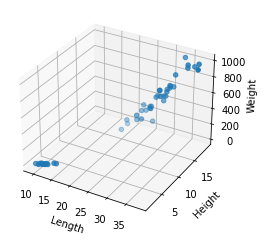

In [20]:
ax = plt.axes(projection='3d')
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.scatter(length, height, weight)
plt.show()

In [55]:
a1 = 0
a2 = 0
b = 0
lr = 0.00115
epochs = 200000

In [56]:
for i in range(epochs):
    predict_weight = a1 * length + a2 * height + b
    err = weight - predict_weight
    
    diff_a1 = -(2/len(length)) * sum(err * length)
    diff_a2 = -(2/len(height)) * sum(err * height)
    diff_b = -(2/len(height)) * sum(err)
    
    a1 -= lr * diff_a1
    a2 -= lr * diff_a2
    b -= lr * diff_b
    
    if i % 1000 == 0:
        print('Epoch = %.04d, a1 = %.04f, a2 = %.04f, b = %.04f' %(i, a1, a2, b))

Epoch = 0000, a1 = 31.9703, a2 = 16.0608, b = 1.0224
Epoch = 1000, a1 = -8.4580, a2 = 63.0339, b = -30.1363
Epoch = 2000, a1 = -7.4457, a2 = 59.7719, b = -47.1725
Epoch = 3000, a1 = -5.6028, a2 = 57.0083, b = -63.4190
Epoch = 4000, a1 = -3.7872, a2 = 54.3919, b = -78.9512
Epoch = 5000, a1 = -2.0478, a2 = 51.8918, b = -93.8022
Epoch = 6000, a1 = -0.3845, a2 = 49.5015, b = -108.0019
Epoch = 7000, a1 = 1.2058, a2 = 47.2160, b = -121.5791
Epoch = 8000, a1 = 2.7265, a2 = 45.0307, b = -134.5608
Epoch = 9000, a1 = 4.1804, a2 = 42.9413, b = -146.9734
Epoch = 10000, a1 = 5.5706, a2 = 40.9434, b = -158.8416
Epoch = 11000, a1 = 6.8999, a2 = 39.0332, b = -170.1894
Epoch = 12000, a1 = 8.1708, a2 = 37.2067, b = -181.0397
Epoch = 13000, a1 = 9.3860, a2 = 35.4603, b = -191.4141
Epoch = 14000, a1 = 10.5480, a2 = 33.7905, b = -201.3336
Epoch = 15000, a1 = 11.6589, a2 = 32.1939, b = -210.8182
Epoch = 16000, a1 = 12.7212, a2 = 30.6674, b = -219.8869
Epoch = 17000, a1 = 13.7369, a2 = 29.2077, b = -228.5579

Epoch = 156000, a1 = 35.8407, a2 = -2.5574, b = -417.2598
Epoch = 157000, a1 = 35.8426, a2 = -2.5601, b = -417.2761
Epoch = 158000, a1 = 35.8444, a2 = -2.5627, b = -417.2917
Epoch = 159000, a1 = 35.8462, a2 = -2.5652, b = -417.3065
Epoch = 160000, a1 = 35.8478, a2 = -2.5676, b = -417.3208
Epoch = 161000, a1 = 35.8494, a2 = -2.5699, b = -417.3344
Epoch = 162000, a1 = 35.8509, a2 = -2.5721, b = -417.3474
Epoch = 163000, a1 = 35.8524, a2 = -2.5742, b = -417.3598
Epoch = 164000, a1 = 35.8538, a2 = -2.5762, b = -417.3717
Epoch = 165000, a1 = 35.8551, a2 = -2.5781, b = -417.3831
Epoch = 166000, a1 = 35.8564, a2 = -2.5800, b = -417.3940
Epoch = 167000, a1 = 35.8576, a2 = -2.5817, b = -417.4044
Epoch = 168000, a1 = 35.8588, a2 = -2.5834, b = -417.4143
Epoch = 169000, a1 = 35.8599, a2 = -2.5850, b = -417.4238
Epoch = 170000, a1 = 35.8610, a2 = -2.5865, b = -417.4329
Epoch = 171000, a1 = 35.8620, a2 = -2.5880, b = -417.4416
Epoch = 172000, a1 = 35.8630, a2 = -2.5894, b = -417.4499
Epoch = 173000